In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier

## Stroke

In [3]:
stroke = pd.read_csv('Datasets/stroke_clean.csv')

X_stroke = stroke.drop('stroke', axis=1)
y_stroke = stroke['stroke']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_stroke, y_stroke, test_size=0.2, random_state=42, stratify=y_stroke
)

In [5]:
import numpy as np
np.bincount(y_train)

array([3889,  199])

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_res))

Before SMOTE: [3889  199]
After SMOTE: [3889 3889]


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

ratio = (y_train == 0).sum() / (y_train == 1).sum()

model1 = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio / 2
)

model1.fit(X_res, y_res)
y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8346379647749511
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       972
           1       0.14      0.46      0.21        50

    accuracy                           0.83      1022
   macro avg       0.55      0.66      0.56      1022
weighted avg       0.93      0.83      0.87      1022



In [18]:
import numpy as np
from sklearn.metrics import classification_report

y_proba = model1.predict_proba(X_test)[:, 1]

for t in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    y_pred_t = (y_proba > t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred_t, digits=3))


Threshold: 0.3
              precision    recall  f1-score   support

           0      0.970     0.806     0.880       972
           1      0.121     0.520     0.196        50

    accuracy                          0.792      1022
   macro avg      0.546     0.663     0.538      1022
weighted avg      0.929     0.792     0.847      1022


Threshold: 0.4
              precision    recall  f1-score   support

           0      0.970     0.832     0.896       972
           1      0.133     0.500     0.210        50

    accuracy                          0.816      1022
   macro avg      0.552     0.666     0.553      1022
weighted avg      0.929     0.816     0.862      1022


Threshold: 0.5
              precision    recall  f1-score   support

           0      0.968     0.854     0.908       972
           1      0.139     0.460     0.214        50

    accuracy                          0.835      1022
   macro avg      0.554     0.657     0.561      1022
weighted avg      0.928   

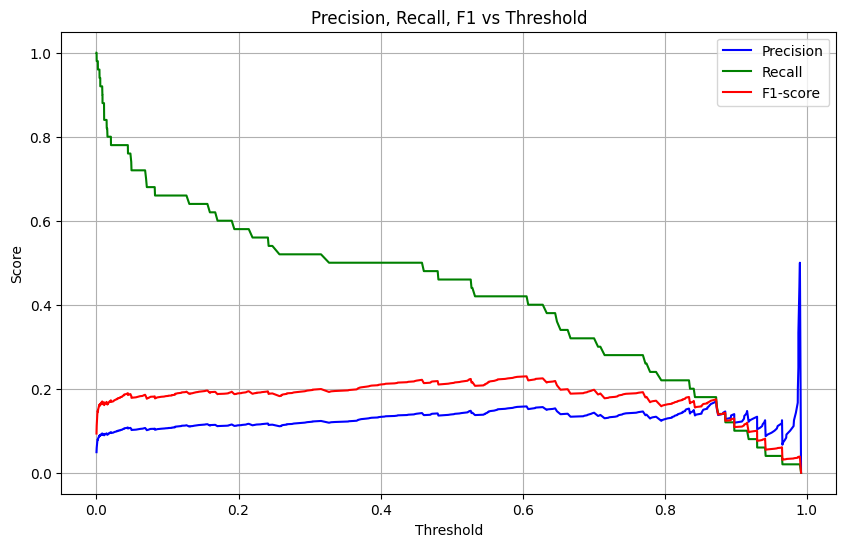

Threshold with max F1: 0.60549134
Precision: 0.15789473684210525
Recall: 0.42
F1-score: 0.2295081927498582


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_proba = model1.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1-score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
print("Threshold with max F1:", best_threshold)
print("Precision:", precision[best_idx])
print("Recall:", recall[best_idx])
print("F1-score:", f1_scores[best_idx])

In [21]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report

y_proba = model1.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

target_recall = 0.5
idx = np.argmin(np.abs(recall[:-1] - target_recall)) 

best_threshold = thresholds[idx]
print("Recommended threshold for ~50% recall:", best_threshold)

y_pred_opt = (y_proba > best_threshold).astype(int)
print(classification_report(y_test, y_pred_opt, digits=3))

Recommended threshold for ~50% recall: 0.327354
              precision    recall  f1-score   support

           0      0.969     0.811     0.883       972
           1      0.120     0.500     0.193        50

    accuracy                          0.795      1022
   macro avg      0.544     0.655     0.538      1022
weighted avg      0.928     0.795     0.849      1022



In [25]:
import joblib

joblib.dump(model1, "Trained_Models/stroke_model.pkl")

['Trained_Models/stroke_model.pkl']

## Heart

In [26]:
heart = pd.read_csv('Datasets/heart_clean.csv')

X_heart = heart.drop('HeartDisease', axis=1)
y_heart = heart['HeartDisease']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize model
model2 = RandomForestClassifier(
    n_estimators=200,      
    max_depth=None,       
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1 
)

# Train
model2.fit(X_train, y_train)

# Predict
y_pred = model2.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [29]:
joblib.dump(model2, "Trained_Models/heart_model.pkl")

['Trained_Models/heart_model.pkl']

## Hepatitis

In [15]:
hep = pd.read_csv('Datasets/hepatitis_clean.csv')

In [16]:
X_hep = hep.drop('Category', axis=1)
y_hep = hep['Category'].replace({
    0: 0,  # healthy
    1: 0,  # healthy
    2: 1,  # hepatitis
    3: 1,  # fibrosis
    4: 1   # cirrhosis
})


In [17]:
print(y_hep.value_counts())
hep['Category'].unique()

Category
0    540
1     75
Name: count, dtype: int64


array([0, 1, 2, 3, 4])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_hep, y_hep, test_size=0.2, random_state=42, stratify=y_hep
)

In [22]:
#Handling class imbalance by generating synthetic samples based on already present data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("Any NaNs?", X_train_res.isna().any().any())
print("Class balance after SMOTE:\n", pd.Series(y_train_res).value_counts())

Any NaNs? False
Class balance after SMOTE:
 Category
0    432
1    432
Name: count, dtype: int64


In [24]:
# Initialize model
model3 = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    objective='binary:logistic',  
    eval_metric='logloss',
    random_state=42,
    enable_categorical=False
)

# Train
model3.fit(X_train_res, y_train_res)

# Predict
y_pred = model3.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.967479674796748
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.87      0.87      0.87        15

    accuracy                           0.97       123
   macro avg       0.92      0.92      0.92       123
weighted avg       0.97      0.97      0.97       123



In [26]:
import joblib
joblib.dump(model3, "Trained_Models/hepatitis_model.pkl")

['Trained_Models/hepatitis_model.pkl']